In [333]:
#Import packages
#---------------------------------------
import sys
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

#Import your modules
#---------------------------------------
import admin_functions as adfn
import criticality as crfn
import IS as isfn
import trace_analyse as tfn

# Define paths
#----------------------------------------------------------------------
Fcode = '/Users/dominicburrows/Dropbox/PhD/Analysis/my_scripts/GitHub/'
Fdata = '/Users/dominicburrows/Dropbox/PhD/analysis/Project/'
Fdoc = '/Users/dominicburrows/Documents/'
F10t = '/Volumes/Dominic 10tb/'
F10t2 = '/Volumes/Dominic 10tb2/'
Ftm = '/Volumes/Dominic Time Machine/'
Ffig = '/Users/dominicburrows/Dropbox/PhD/figures/'

%load_ext autoreload
sys.version

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


'3.7.6 (default, Jan  8 2020, 13:42:34) \n[Clang 4.0.1 (tags/RELEASE_401/final)]'

# Process data

In [4]:
#Find range to make bin over for correlation function
coord_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regcoord*')

In [133]:
from sklearn.metrics.pairwise import euclidean_distances

#Find range to make bin over for correlation function
mini = 0
maxi = 0
dim = [.8, .8, 15]

for c in coord_l:
    coord = np.load(c)
    dist = euclidean_distances(coord)
    curr_max = np.max(dist)
    if maxi < curr_max:
        maxi = curr_max
print(maxi)

655.138672844927


In [334]:
#Calculate criticality statistics
trace_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regtrace*')[:10]
dff_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regdelt*')[:10]
bind_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*regbin*56*')[:10]
coord_l = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*labcoor*')[:10]
len(trace_l), len(dff_l), len(bind_l), len(coord_l)

(10, 10, 10, 10)

In [26]:
#Find mean nnb in previous work
prac = adfn.return_files(Fdata, 'PTZ-WILDTYPE', '*cutrealtrace*')
nnb_list = []
for i in range(len(prac)):
    nnb_list = np.append(nnb_list, np.load(prac[i]).shape[0]*(0.16/100))
print('mean neighbours = ' + str(np.mean(nnb_list)))

mean neighbours = 14.12128


In [ ]:
n_neigh = 14 #14
n_bins = 200 #Number of bins for correlation function
reg_list = ['all', 'Telencephalon', 'Diencephalon', 'Midbrain', 'Hindbrain']

for i in range(len(trace_l)):
    trace = np.load(trace_l[i])
    dff = np.load(dff_l[i])
    bind = np.load(bind_l[i])
    coord = (np.load(coord_l[i]))
    name = adfn.save_name(trace_l[i])

    for reg in reg_list:
        sub_trace, sub_dff, sub_bind, sub_coord = tfn.select_region(trace, dff, bind, coord, reg)
        data = tfn.trace_analyse(name, sub_trace, sub_dff, sub_bind, sub_coord) #Initiate class
        
        #Criticality statistics
        crit = data.criticality_stats(n_neigh, n_bins, mini, maxi) 
        par_list = ['av', 'llr_s', 'llr_d', 'exp_s', 'exp_d', 'dcc', 'br', 'corrdis']
        dic = {}
        dic.update({par: data.__dict__[par] for par in par_list})
        np.save(Fdata + 'BLNDEV-WILDTYPE/' + name + '_' + reg + '_criticality.npy', dic)
        
        #Firing statistics
        f_stats = data.firing_stats(30, 50) 
        par_list = ['fr', 'fa', 'fd', 's_corr', 'l_corr', 'dim']
        dic = {}
        dic.update({par: data.__dict__[par] for par in par_list})
        np.save(Fdata + 'BLNDEV-WILDTYPE/' + name + '_' + reg + '_firing.npy', dic)
        
        
    print('Processed ' + name)

# Whole brain

In [336]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*3dpf*all*crit*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*4dpf*all*crit*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*5dpf*all*crit*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*6dpf*all*crit*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*7dpf*all*crit*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE/', '*8dpf*all*crit*')
data_l = d3, d4, d5, d6, d7, d8
data_l

(['BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-07_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-08_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy'],
 ['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-04_2photon_sess-01-4dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-05_2photon_sess-01-4dpf_BLNGR_run-01_all_criticality.npy'],
 ['BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-5dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-04_2photon_sess-01-5dpf_BLNGR_run-01_all_cr

In [337]:
#NNB = 15, q = 0.57
for i in range(len(data_l)):
    for e in range(len(data_l[i])):
        data = np.load(data_l[i][e], allow_pickle=True).item()
        av = data['av']
        print(data_l[i][e])
        print(np.max(av[0]))
        print(np.max(av[1])/2.73)

BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy
10960
32.96703296703297
BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy
25077
82.78388278388279
BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy
4166
16.483516483516485
BLNDEV-WILDTYPE-07_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy
4101
12.820512820512821
BLNDEV-WILDTYPE-08_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy
3099
21.245421245421245
BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_all_criticality.npy
4889
18.681318681318682
BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01_all_criticality.npy
21944
30.76923076923077
BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01_all_criticality.npy
20208
23.44322344322344
BLNDEV-WILDTYPE-04_2photon_sess-01-4dpf_BLNGR_run-01_all_criticality.npy
67383
165.56776556776558
BLNDEV-WILDTYPE-05_2photon_sess-01-4dpf_BLNGR_run-01_all_criticality.npy
17597
69.59706959706959
BLNDEV-WILDTYPE-01_2photon_se

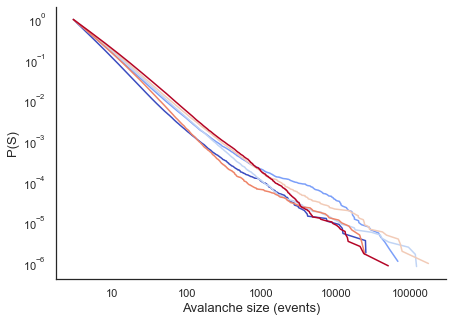

In [340]:
import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.coolwarm(np.linspace(0,1,len(data_l)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_l)):
    av_s, av_d = crfn.mean_av(data_l[i])
    powerlaw.plot_ccdf(av_s, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

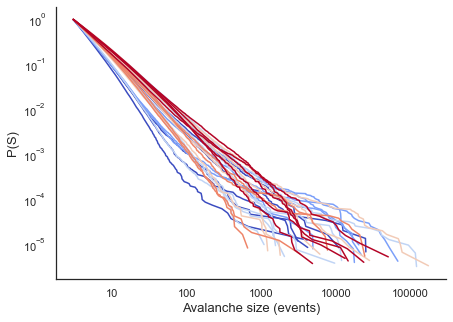

In [338]:
import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.coolwarm(np.linspace(0,1,len(data_l)))
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_l)):
    for e in range(len(data_l[i])):
        data = np.load(data_l[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

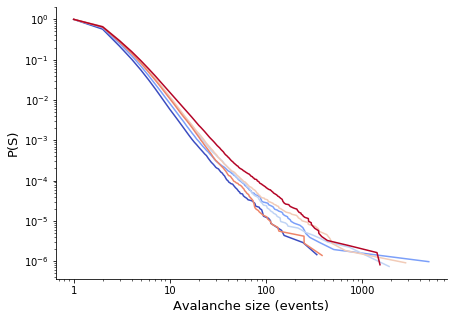

In [312]:
import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.coolwarm(np.linspace(0,1,len(data_l)))
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_l)):
    av_s, av_d = crfn.mean_av(data_l[i])
    powerlaw.plot_ccdf(av_d, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

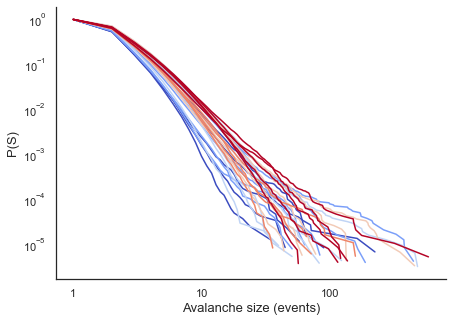

In [339]:
import matplotlib
from matplotlib import cm
import powerlaw
colors  = cm.coolwarm(np.linspace(0,1,len(data_l)))
choose=1
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_l)):
    for e in range(len(data_l[i])):
        data = np.load(data_l[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [341]:
#This function extracts each data type
def load(data_list):
    name_list = ['br', 'dcc', 'exp_s', 'exp_d']
    obj = { i:[[]]*len(data_list) for i in name_list  }

    for i in range(len(data_list)):
        for e in range(len(data_list[i])):
            data = np.load(data_list[i][e], allow_pickle=True).item()
            for name in name_list:
                curr = data[name]
                obj[name][i] = np.append(obj[name][i], curr)

        print(i)
        
    len_list = []
    for i in range(len(data_list)):
        count = 0
        for e in range(len(data_list[i])):
            count+=1

        len_list = np.append(len_list, count)
        
    return(obj, len_list)
            
#This function sorts all data by condition
def sort(curr_name, obj):
    input_data = adfn.comb_list(obj[curr_name])

    cond = np.arange(3, 9)
    cond_l = []
    for i in range(len(len_list)):
        for e in range(int(len_list[i])):
            cond_l = np.append(cond_l, cond[i])

    df = pd.DataFrame({curr_name:input_data , "condition": cond_l})
    return(df)

In [342]:
obj, len_list = load(data_l)
br_df = sort('br', obj)
dcc_df = sort('dcc', obj)
xs_df = sort('exp_s', obj)
xd_df = sort('exp_d', obj)

0
1
2
3
4
5


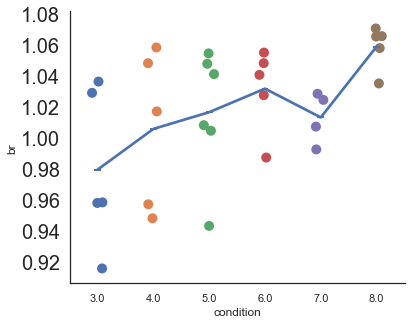

In [343]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
    
data_name = 'br'
dic = br_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


In [344]:
from scipy import stats
stats.pearsonr(dic['br'], dic['condition'])

(0.520481039193331, 0.0031924600255140486)

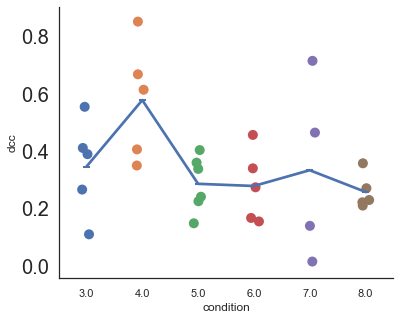

In [345]:
import seaborn as sns
data_name = 'dcc'
dic = dcc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [346]:
from scipy import stats
stats.pearsonr(dic['dcc'], dic['condition'])

(-0.3062553435618709, 0.09976864779004634)

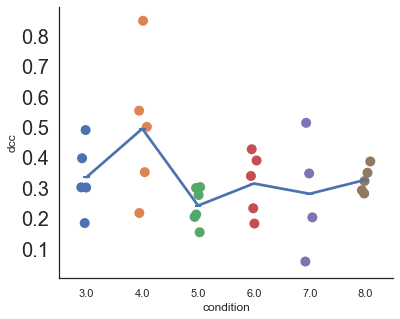

In [319]:
import seaborn as sns
data_name = 'dcc'
dic = dcc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [17]:
from scipy import stats
stats.pearsonr(dic['dcc'], dic['condition'])

(-0.16524373767741082, 0.38285916269175213)

In [32]:
data1 = dic[dic['condition'] == 4.0][data_name]
adfn.mean_std('3', data1)

data2 = dic[dic['condition'] == 3.0][data_name]
adfn.mean_std('5', data2)

3 mean = 0.11810850962299342  , std = 0.06537867016711056
5 mean = 0.13341407201895533  , std = 0.040559027356749926


In [33]:
from scipy import stats
t, p = stats.ttest_ind(data1, data2)
if p > 0.05:
    print('Samples are the same')
else:
    print('Samples are significantly different')
print('t = ' + str(t) +  '   p = ' + str(p))


Samples are the same
t = -0.19893456878445995   p = 0.847276801884268


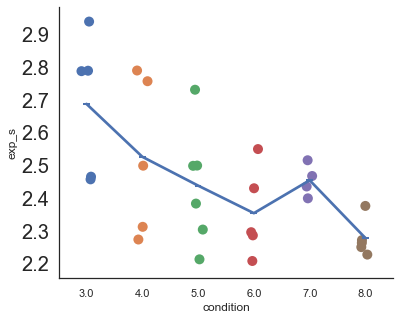

In [347]:
data_name = 'exp_s'
dic = xs_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [348]:
from scipy import stats
stats.pearsonr(dic['exp_s'], dic['condition'])

(-0.5831903515979924, 0.0007186561331050128)

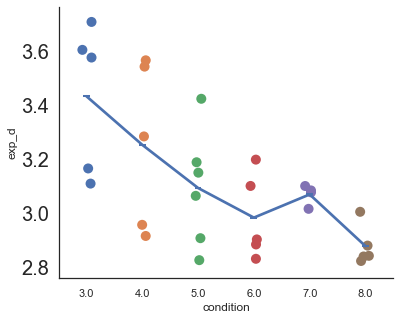

In [349]:
data_name = 'exp_d'
dic = xd_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [22]:
data_l = d3,d4, d5, d6,d7, d8
data_l

(['BLNDEV-WILDTYPE-02_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-05_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-06_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-07_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-08_2photon_sess-01-3dpf_BLNGR_run-01_all_criticality.npy'],
 ['BLNDEV-WILDTYPE-01_2photon_sess-01-4dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-4dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-03_2photon_sess-01-4dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-04_2photon_sess-01-4dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-05_2photon_sess-01-4dpf_BLNGR_run-01_all_criticality.npy'],
 ['BLNDEV-WILDTYPE-01_2photon_sess-01-5dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-02_2photon_sess-01-5dpf_BLNGR_run-01_all_criticality.npy',
  'BLNDEV-WILDTYPE-04_2photon_sess-01-5dpf_BLNGR_run-01_all_cr

In [100]:
748/2.73

273.992673992674

In [23]:
import matplotlib
import powerlaw
choose=1

llr_l = [[]]*6

for i in range(len(data_l)):
    llr = [[]]*len(data_l[i])
    for e in range(len(data_l[i])):
        data = np.load(data_l[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        print(np.max(avdistcut)/2.73)

20.146520146520146
20.87912087912088
10.622710622710622
8.791208791208792
15.750915750915752
11.72161172161172
26.007326007326007
17.582417582417584
41.02564102564103
40.65934065934066
24.175824175824175
13.186813186813186
38.095238095238095
19.413919413919412
16.84981684981685
9.89010989010989
49.81684981684982
28.205128205128204
19.047619047619047
21.978021978021978
19.413919413919412
15.384615384615385
20.146520146520146
26.73992673992674
19.413919413919412
25.274725274725274
19.78021978021978
17.582417582417584


KeyboardInterrupt: 

In [95]:
np.max(avdistcut)

57851

In [97]:
np.max(data['av'][1])

748

NameError: name 'xmin' is not defined

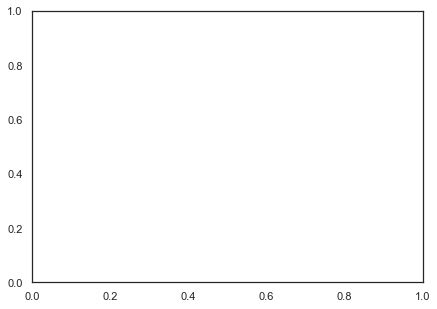

In [27]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'grey','royalblue', 'green', 'orange', 'red']
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

llr_l = [[]]*6

for i in range(len(data_l)):
    llr = [[]]*len(data_l[i])
    for e in range(len(data_l[i])):
        data = np.load(data_l[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        fit = powerlaw.Fit(avdistcut, xmin)
        R,p = fit.distribution_compare('power_law', 'lognormal', normalized_ratio = True)
        llr[e] = R,p
    llr_l[i] = llr
    print(i)

In [299]:
llr_l[0]

[(0.13582242893059743, 0.8919616596458775),
 (-6.3210693285674315, 2.5975944400587087e-10),
 (-17.64515578898834, 1.1086809272748051e-69),
 (-1.1706228498339593, 0.24175040852191265),
 (-0.5346793451402208, 0.5928716065367127)]

In [300]:
llr_l[1]

[(-0.52062317734611, 0.6026293002112326),
 (3.324766601270164, 0.0008849258222544091),
 (2.1201703833431216, 0.033991679085578805),
 (-11.661885369332378, 1.9957362354805626e-31),
 (0.8755033843377508, 0.381300069577741)]

In [301]:
llr_l[2]

[(2.7340412076689273, 0.006256221425286198),
 (-19.01528351321257, 1.2744602117815566e-80),
 (1.50530443854007, 0.1322458245897079),
 (-0.0890953446867597, 0.9290061370846503),
 (-0.5792060690083515, 0.5624501362435002),
 (-0.3340230138463815, 0.7383621925192896)]

In [302]:
llr_l[3]

[(2.2842565344174792, 0.022356458766753334),
 (1.426265545974282, 0.15379170587621666),
 (-0.9693051154331385, 0.3323929777569985),
 (-3.4229648825007764, 0.0006194207917946543),
 (0.4553499026536043, 0.6488575303770538)]

In [303]:
llr_l[4]

[(-0.1883729891389412, 0.8505842721923816),
 (1.776588014868743, 0.07563604900193197),
 (1.5111665946825164, 0.13074601109399106),
 (-3.1949497367889492, 0.0013985519514897124)]

In [304]:
llr_l[5]

[(0.7505385510911993, 0.45293041448102733),
 (0.1390474015606188, 0.8894126918083779),
 (-10.44966058571968, 1.470505426726306e-25),
 (1.1387322230408476, 0.25481485847823815),
 (0.9591930622334633, 0.3374614948788732)]

Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


0


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


1


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


2


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


3


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


4


Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit
Calculating best minimal value for power law fit


5


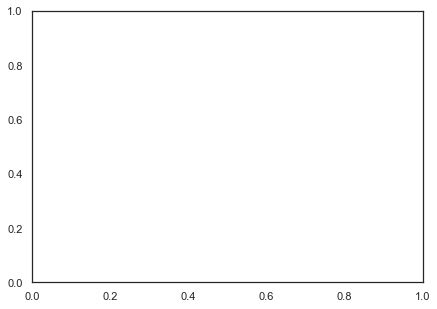

In [28]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'grey','royalblue', 'green', 'orange', 'red']
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

llr_l = [[]]*6

for i in range(len(data_l)):
    llr = [[]]*len(data_l[i])
    for e in range(len(data_l[i])):
        data = np.load(data_l[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        fit = powerlaw.Fit(avdistcut, 3)
        R,p = fit.distribution_compare('truncated_power_law', 'lognormal', normalized_ratio = True)
        llr[e] = R,p
    llr_l[i] = llr
    print(i)

In [29]:
llr_l[0]

[(0.7167300449293793, 0.4735406834528967),
 (-0.021763167291248598, 0.9826368754668463),
 (-0.21853132300213093, 0.827015155787835),
 (0.2501168744534558, 0.8024969667051418),
 (-0.11089439056247413, 0.9117000938496643)]

In [30]:
llr_l[1]

[(0.6485743914723624, 0.516613512389076),
 (3.938333482141518, 8.204950603127626e-05),
 (6.527830786768639, 6.67290206196135e-11),
 (1.160249008829613, 0.24594743859817136),
 (2.6091197455211272, 0.009077547097287048)]

In [31]:
llr_l[2]

[(2.9062910215621898, 0.0036574111236120244),
 (0.16056820734606783, 0.8724334967940157),
 (0.9242459622943898, 0.35535827035142553),
 (0.49074227105852025, 0.6236087450258505),
 (1.391542952255463, 0.16406084426473277),
 (-0.06525975319051018, 0.9479671863041405)]

In [32]:
llr_l[3]

[(-1.1098197141183466, 0.26707672238827096),
 (3.004584367135247, 0.002659439911911526),
 (2.2582260384778925, 0.023931570683509394),
 (-1.5357430825252236, 0.12460140417421946),
 (1.8478689004133442, 0.06462131048661525)]

In [33]:
llr_l[4]

[(1.9269679163804283, 0.053983628440904596),
 (-0.34990328193730497, 0.72641128391601),
 (1.4843079099709438, 0.1377272528065681),
 (4.295767240615033, 1.7409017226390015e-05)]

In [34]:
llr_l[5]

[(0.7593640584105185, 0.4476348075115022),
 (-1.5596989561047514, 0.11883103896077499),
 (-0.06031399670512297, 0.9519055544824748),
 (7.399759339947251, 1.3643152680190677e-13),
 (2.0430817641406906, 0.04104434479615325)]

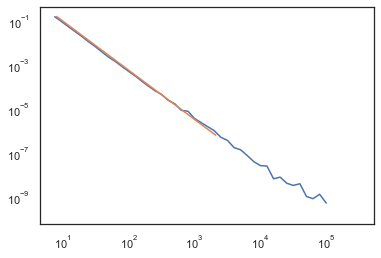

In [284]:
fig = fit.plot_pdf()
results.power_law.plot_pdf()

In [252]:
choose = 0
data = np.load(data_l[i][e], allow_pickle=True).item()
avdistcut = data['av'][choose]


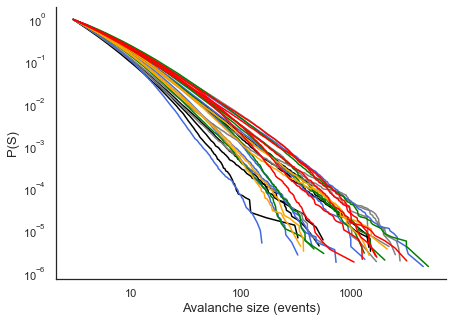

In [24]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'grey','royalblue', 'green', 'orange', 'red']
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_l)):
    for e in range(len(data_l[i])):
        data = np.load(data_l[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

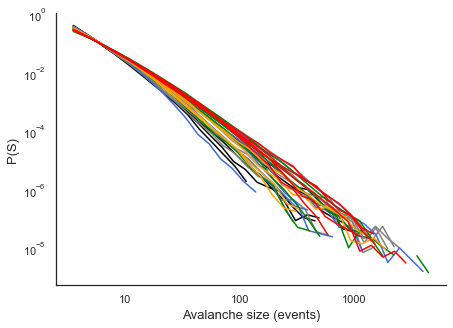

In [38]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'grey','royalblue', 'green', 'orange', 'red']
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_l)):
    for e in range(len(data_l[i])):
        data = np.load(data_l[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_pdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

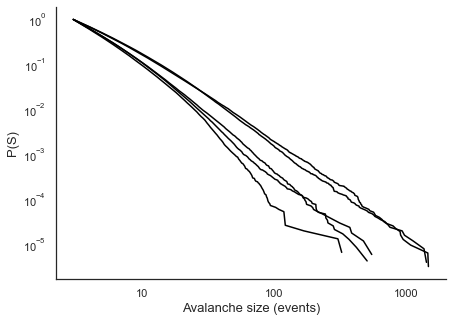

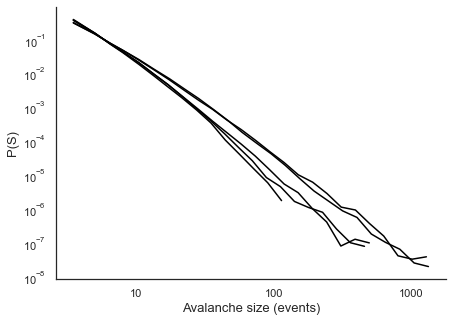

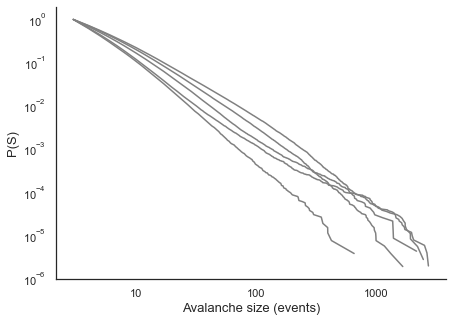

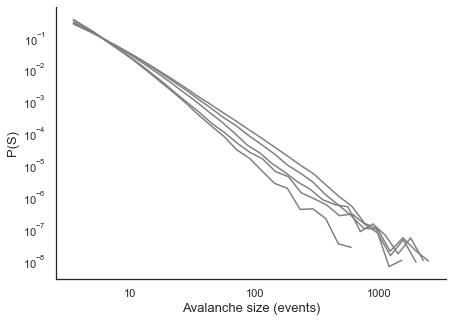

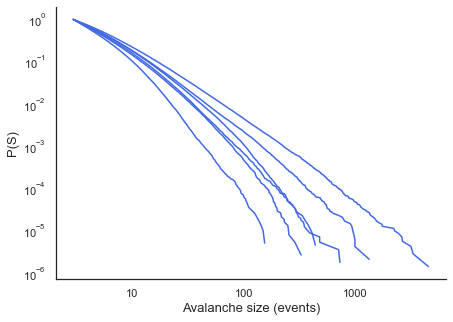

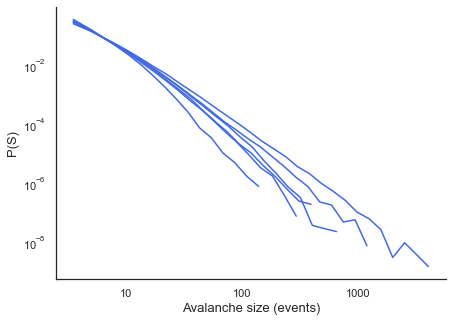

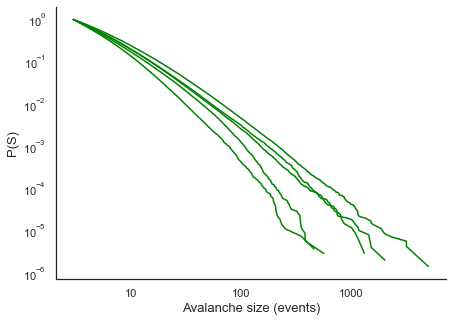

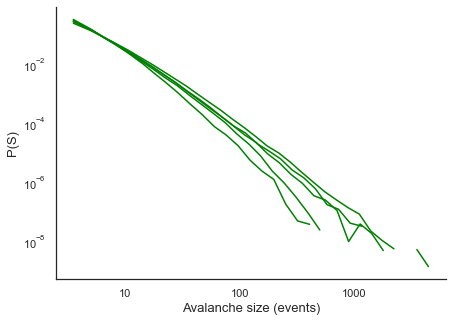

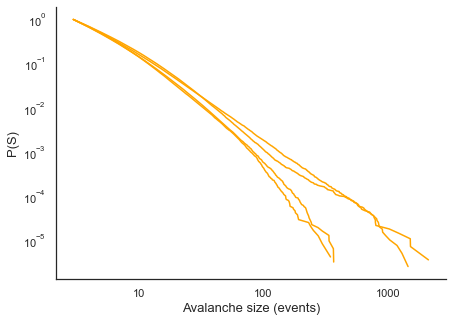

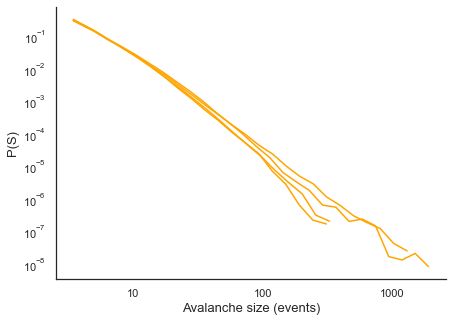

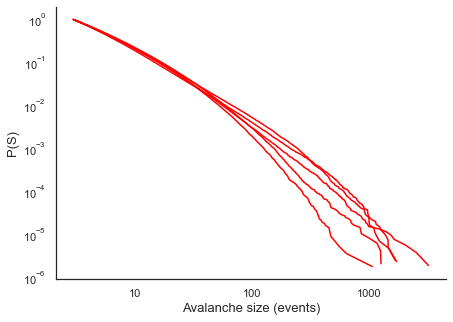

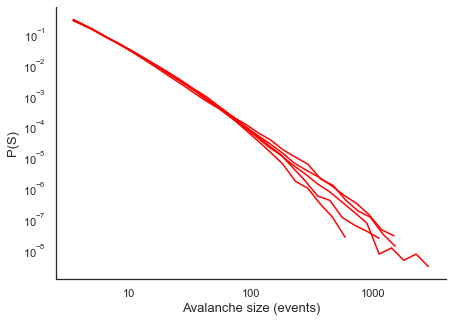

In [37]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'grey','royalblue', 'green', 'orange', 'red']
choose=0

for i in range(len(data_l)):
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(data_l[i])):
        data = np.load(data_l[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #plt.xlim(right = 1000000)  
    #plt.ylim(bottom = 0.000005)  
    #axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(S)', size = '13')
    axarr.set_xlabel('Avalanche size (events)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()
    
    
    fig, axarr = plt.subplots(figsize = (7,5))
    for e in range(len(data_l[i])):
        data = np.load(data_l[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_pdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
    axarr.set_xscale('log')
    axarr.set_yscale('log')
    axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
    #plt.xlim(right = 1000000)  
    #plt.ylim(bottom = 0.000005)  
    #axarr.set_title(str(blnlist[0]), size = '13')
    axarr.set_ylabel('P(S)', size = '13')
    axarr.set_xlabel('Avalanche size (events)', size = '13')
    axarr.spines['top'].set_visible(False)
    axarr.spines['right'].set_visible(False)
    plt.show()

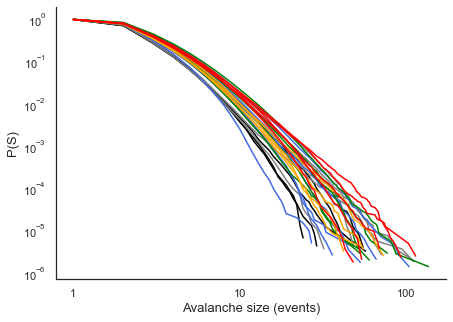

In [25]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'grey','royalblue', 'green', 'orange', 'red']
choose=1
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_l)):
    for e in range(len(data_l[i])):
        data = np.load(data_l[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

# Telencephalon

In [350]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*Tel*crit*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*Tel*crit*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*Tel*crit*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*Tel*crit*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*Tel*crit*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*Tel*crit*')
data_l = d3, d4, d5, d6, d7, d8

In [351]:
obj, len_list = load(data_l)
br_df = sort('br', obj)
dcc_df = sort('dcc', obj)
xs_df = sort('exp_s', obj)
xd_df = sort('exp_d', obj)

0
1
2
3
4
5


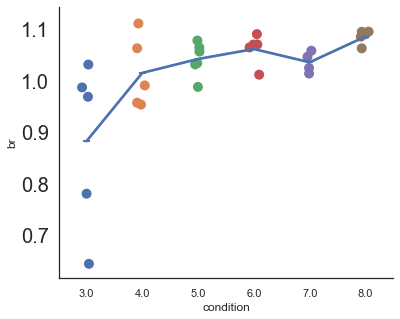

In [352]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
    
data_name = 'br'
dic = br_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


In [353]:
from scipy import stats
stats.pearsonr(dic['br'], dic['condition'])

(0.5686963490497587, 0.0010414909941987862)

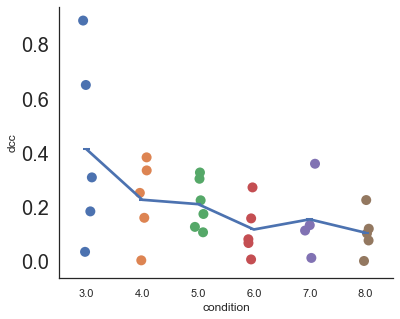

In [354]:
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
    
data_name = 'dcc'
dic = dcc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


In [355]:
from scipy import stats
stats.pearsonr(dic['dcc'], dic['condition'])

(-0.47567884116068637, 0.007888765552627356)

In [88]:
0.05/4

0.0125

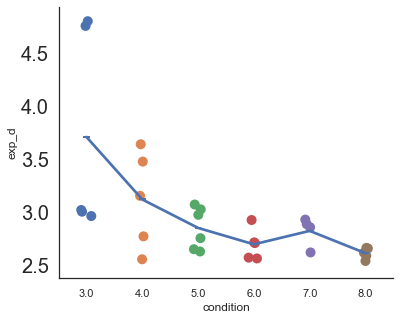

In [356]:
data_name = 'exp_d'
dic = xd_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

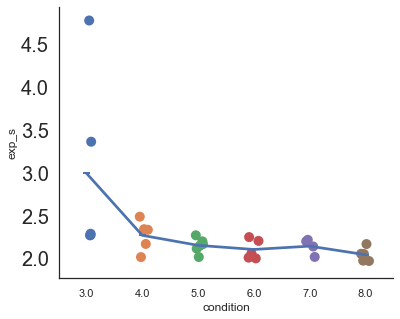

In [331]:
data_name = 'exp_s'
dic = xs_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

In [87]:
from scipy import stats
stats.pearsonr(dic['exp_s'], dic['condition'])

(-0.3932097162015009, 0.03158490519794871)

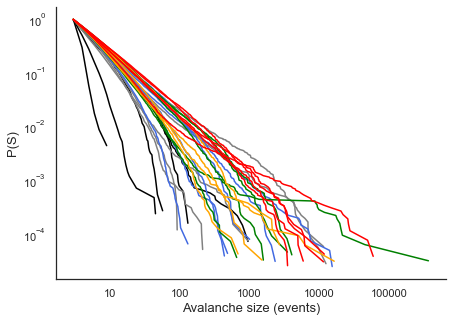

In [332]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'grey','royalblue', 'green', 'orange', 'red']
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_l)):
    for e in range(len(data_l[i])):
        data = np.load(data_l[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

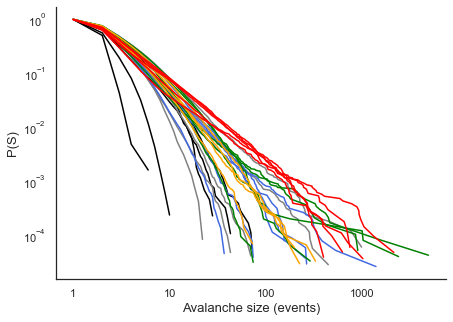

In [216]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'grey','royalblue', 'green', 'orange', 'red']
choose=1
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_l)):
    for e in range(len(data_l[i])):
        data = np.load(data_l[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

# Tectum

In [357]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*Mid*crit*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*Mid*crit*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*Mid*crit*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*Mid*crit*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*Mid*crit*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*Mid*crit*')
data_l = d3, d4, d5, d6, d7, d8

In [358]:
obj, len_list = load(data_l)
br_df = sort('br', obj)
dcc_df = sort('dcc', obj)
xs_df = sort('exp_s', obj)
xd_df = sort('exp_d', obj)

0
1
2
3
4
5


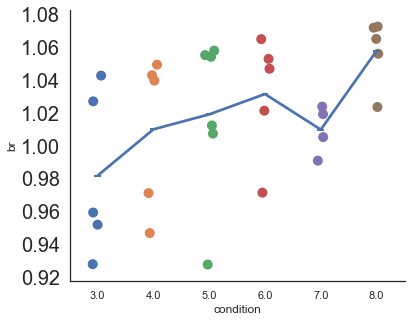

In [359]:
data_name = 'br'
dic = br_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

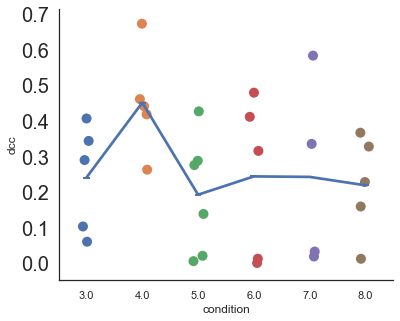

In [360]:
data_name = 'dcc'
dic = dcc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

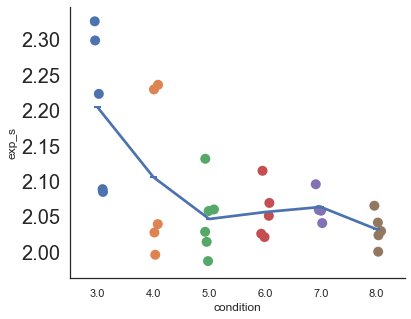

In [231]:
data_name = 'exp_s'
dic = xs_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

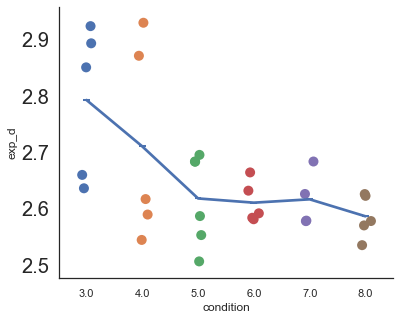

In [232]:
data_name = 'exp_d'
dic = xd_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

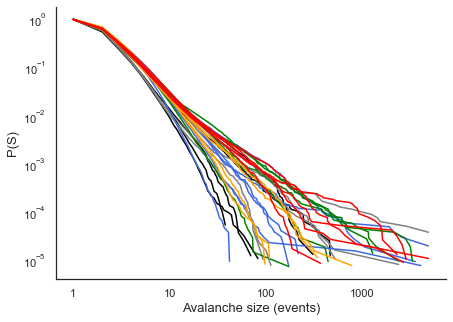

In [233]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'grey','royalblue', 'green', 'orange', 'red']
choose=1
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(data_l)):
    for e in range(len(data_l[i])):
        data = np.load(data_l[i][e], allow_pickle=True).item()
        avdistcut = data['av'][choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

# Diencephalon

In [361]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*Di*crit*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*Di*crit*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*Di*crit*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*Di*crit*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*Di*crit*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*Di*crit*')
data_l = d3, d4, d5, d6, d7, d8


In [362]:
obj, len_list = load(data_l)
br_df = sort('br', obj)
dcc_df = sort('dcc', obj)
xs_df = sort('exp_s', obj)
xd_df = sort('exp_d', obj)

0
1
2
3
4
5


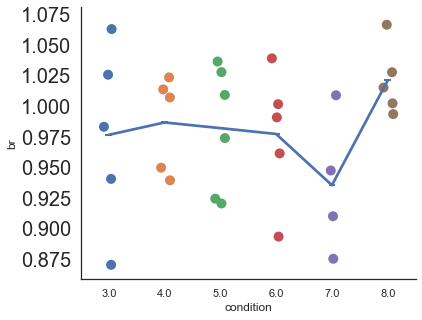

In [369]:
data_name = 'br'
dic = br_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

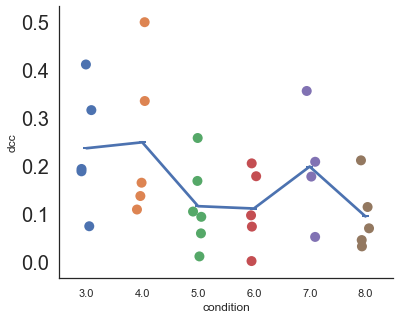

In [365]:
data_name = 'dcc'
dic = dcc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

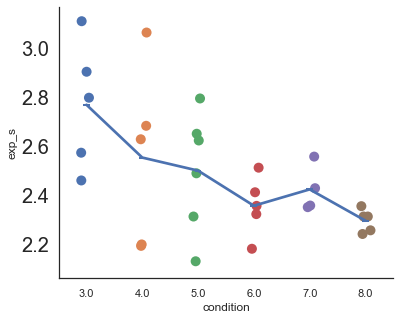

In [363]:
data_name = 'exp_s'
dic = xs_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# Hindbrain

In [366]:
d3 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*3dpf*Hi*crit*')
d4 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*4dpf*Hi*crit*')
d5 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*5dpf*Hi*crit*')
d6 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*6dpf*Hi*crit*')
d7 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*7dpf*Hi*crit*')
d8 = adfn.return_files(Fdata, 'BLNDEV-WILDTYPE', '*8dpf*Hi*crit*')
data_l = d3, d4, d5, d6, d7, d8

In [367]:
obj, len_list = load(data_l)
br_df = sort('br', obj)
dcc_df = sort('dcc', obj)
xs_df = sort('exp_s', obj)
xd_df = sort('exp_d', obj)

0
1
2
3
4
5


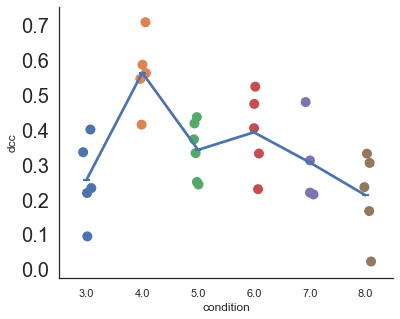

In [368]:
data_name = 'dcc'
dic = dcc_df

fig, ax = plt.subplots(figsize = (6,5))
ax = sns.pointplot(x="condition", y=data_name, data = dic, join=True, ci=0, scale=1, markers = '_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="condition", y=data_name, data = dic,size = 10, jitter = True ,alpha = 1)

plt.yticks(size = 20)
points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

# Tectal data

In [51]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_bin = sorted(glob.glob('*NR*3dpf*spikes.dat*')) 
NR_5_bin = sorted(glob.glob('*NR*5dpf*spikes.dat*')) 
NR_7_bin = sorted(glob.glob('*NR*7dpf*spikes.dat*')) 

GR_3_bin = sorted(glob.glob('*GR*3dpf*spikes.dat*')) 
GR_5_bin = sorted(glob.glob('*GR*5dpf*spikes.dat*')) 
GR_7_bin = sorted(glob.glob('*GR*7dpf*spikes.dat*')) 

NR_3_coord = sorted(glob.glob('*NR*3dpf*cent*')) 
NR_5_coord = sorted(glob.glob('*NR*5dpf*cent*')) 
NR_7_coord = sorted(glob.glob('*NR*7dpf*cent*')) 

GR_3_coord = sorted(glob.glob('*GR*3dpf*cent*')) 
GR_5_coord = sorted(glob.glob('*GR*5dpf*cent*')) 
GR_7_coord = sorted(glob.glob('*GR*7dpf*cent*')) 

bin_list = NR_3_bin, NR_5_bin, NR_7_bin, GR_3_bin, GR_5_bin, GR_7_bin
coord_list = NR_3_coord, NR_5_coord, NR_7_coord, GR_3_coord, GR_5_coord, GR_7_coord

In [ ]:
#nnb
#-------
for i in range(len(coord_list)):
    for e in range(len(coord_list[i])):
        coord = np.loadtxt(coord_list[i][e])
        nnb = crfn.neighbour_new(coord, 50, [.8, .8, 5])
        np.save(savepath + coord_list[i][e][:coord_list[i][e].find('all_cells')+10] + 'nnb.npy', nnb)
        print('Done ' + coord_list[i][e])

In [71]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_nnb = sorted(glob.glob('*NR*3dpf*nnb*')) 
NR_5_nnb = sorted(glob.glob('*NR*5dpf*nnb*')) 
NR_7_nnb = sorted(glob.glob('*NR*7dpf*nnb*')) 

GR_3_nnb = sorted(glob.glob('*GR*3dpf*nnb*')) 
GR_5_nnb = sorted(glob.glob('*GR*5dpf*nnb*')) 
GR_7_nnb = sorted(glob.glob('*GR*7dpf*nnb*')) 
nnb_list = NR_3_nnb, NR_5_nnb, NR_7_nnb, GR_3_nnb, GR_5_nnb, GR_7_nnb

In [90]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_pkg = sorted(glob.glob('*NR*3dpf*pkg*')) 
NR_5_pkg = sorted(glob.glob('*NR*5dpf*pkg*')) 
NR_7_pkg = sorted(glob.glob('*NR*7dpf*pkg*')) 

GR_3_pkg = sorted(glob.glob('*GR*3dpf*pkg*')) 
GR_5_pkg = sorted(glob.glob('*GR*5dpf*pkg*')) 
GR_7_pkg = sorted(glob.glob('*GR*7dpf*pkg*')) 
NR_3_av = sorted(glob.glob('*NR*3dpf*av*')) 
NR_5_av = sorted(glob.glob('*NR*5dpf*av*')) 
NR_7_av = sorted(glob.glob('*NR*7dpf*av*')) 

GR_3_av = sorted(glob.glob('*GR*3dpf*av*')) 
GR_5_av = sorted(glob.glob('*GR*5dpf*av*')) 
GR_7_av = sorted(glob.glob('*GR*7dpf*av*')) 
NR_list = NR_3_av, NR_5_av, NR_7_av
GR_list = GR_3_av, GR_5_av, GR_7_av
NR_list, GR_list

((['180209_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_av.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_av.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f4_sa_aligned_all_cells_av.npy',
   '180319_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_av.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_av.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f3_sa_aligned_all_cells_av.npy'],
  ['180129_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy',
   '180129_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_av.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy',
   '180328_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_av.npy',
   '180718_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy'],
  ['180220_WT_NR_h2b_gc6s_7dpf_f1_sa_aligned_all_cells_av.npy',
   '180220_WT_NR_h2b_gc6s_7dpf_f2_sa_a

In [ ]:
#av calculation
#----------------
for i in range(len(nnb_list)):
    for e in range(len(nnb_list[i])):
        nnb = np.load(nnb_list[i][e])
        bind = np.loadtxt(bin_list[i][e])
        av,pkg = crfn.avalanche_r(nnb, bind)
        np.save(savepath + nnb_list[i][e][:nnb_list[i][e].find('all_cells')+10] + 'av.npy', av)
        np.save(savepath + nnb_list[i][e][:nnb_list[i][e].find('all_cells')+10] + 'pkg.npy', pkg)
        print('Done ' + nnb_list[i][e])

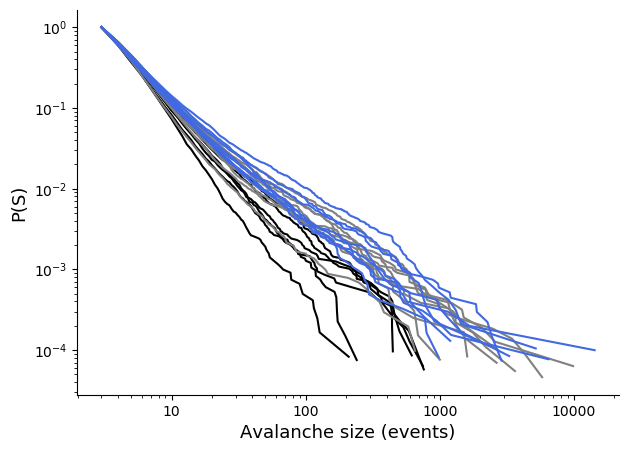

In [107]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'grey','royalblue']
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(NR_list)):
    for e in range(len(NR_list[i])):
        avdistcut = np.load(NR_list[i][e])[choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

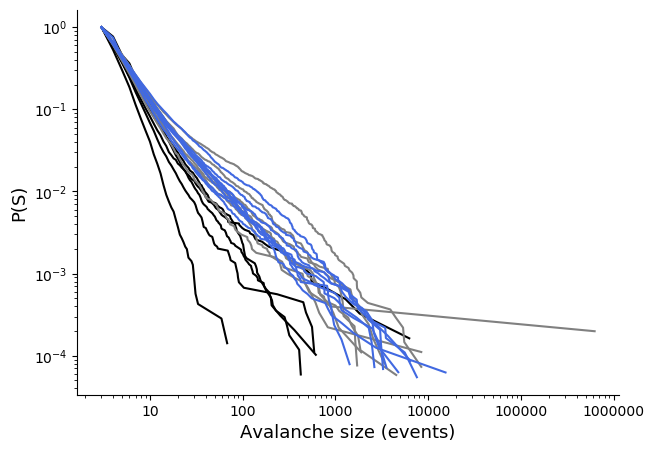

In [108]:
import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
colors = ['black', 'grey','royalblue']
choose=0
fig, axarr = plt.subplots(figsize = (7,5))

for i in range(len(GR_list)):
    for e in range(len(GR_list[i])):
        avdistcut = np.load(GR_list[i][e])[choose]
        powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = colors[i])
        
axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

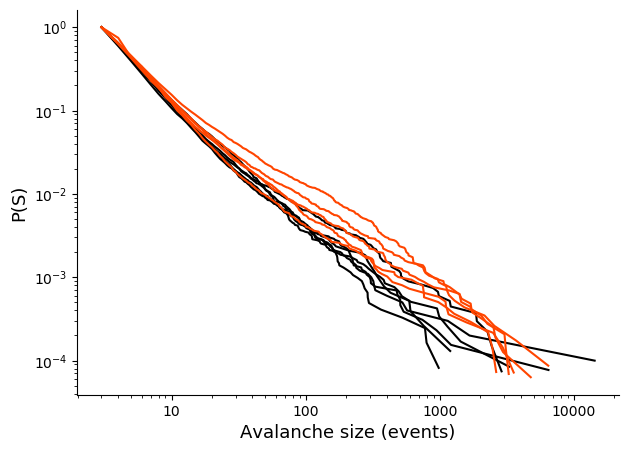

In [120]:
#3dpf comparison

import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
choose=0
index = 0
fig, axarr = plt.subplots(figsize = (7,5))


for e in range(len(NR_list[index])):
    avdistcut = np.load(NR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'black')

for e in range(len(GR_list[index])):
    avdistcut = np.load(GR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'orangered')

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

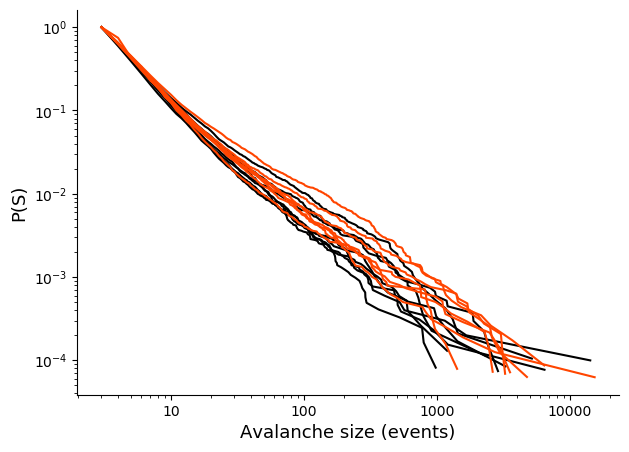

In [119]:
#5dpf comparison

import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
choose=0
index = 1
fig, axarr = plt.subplots(figsize = (7,5))


for e in range(len(NR_list[index])):
    avdistcut = np.load(NR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'black')

for e in range(len(GR_list[index])):
    avdistcut = np.load(GR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'orangered')

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

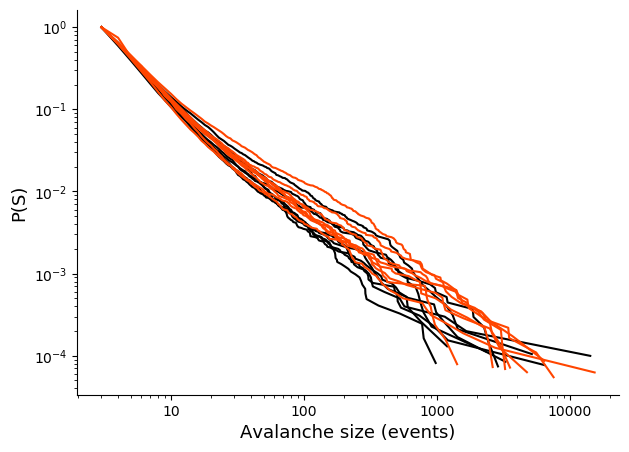

In [118]:
#7dpf comparison

import matplotlib
import powerlaw
num1 = adfn.name_zero('front',2,12,1)
choose=0
index = 2
fig, axarr = plt.subplots(figsize = (7,5))


for e in range(len(NR_list[index])):
    avdistcut = np.load(NR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'black')

for e in range(len(GR_list[index])):
    avdistcut = np.load(GR_list[i][e])[choose]
    powerlaw.plot_ccdf(avdistcut, markersize = 1, alpha = 1, c = 'orangered')

axarr.set_xscale('log')
axarr.set_yscale('log')
axarr.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#plt.xlim(right = 1000000)  
#plt.ylim(bottom = 0.000005)  
#axarr.set_title(str(blnlist[0]), size = '13')
axarr.set_ylabel('P(S)', size = '13')
axarr.set_xlabel('Avalanche size (events)', size = '13')
axarr.spines['top'].set_visible(False)
axarr.spines['right'].set_visible(False)
plt.show()

In [179]:
np.load(av_list[i][e])

array([[245,   4,  32, ...,   8,   5,   3],
       [ 13,   2,   7, ...,   3,   2,   1]])

In [181]:
for i in range(len(av_list)):
    for e in range(len(av_list[i])):
        curr_av = np.load(av_list[i][e])
        dcc = crfn.DCC(curr_av)
        np.save(savepath + av_list[i][e][:av_list[i][e].find('all_cells')+10] + 'dcc.npy', dcc)
        print('Done ' + av_list[i][e])

Done 180209_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_av.npy
Done 180219_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_av.npy
Done 180219_WT_NR_h2b_gc6s_3dpf_f4_sa_aligned_all_cells_av.npy
Done 180319_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_av.npy
Done 180625_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_av.npy
Done 180625_WT_NR_h2b_gc6s_3dpf_f3_sa_aligned_all_cells_av.npy
Done 180129_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy
Done 180129_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_av.npy
Done 180321_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy
Done 180321_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy
Done 180328_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_av.npy
Done 180717_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy
Done 180717_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_av.npy
Done 180718_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_av.npy
Done 180220_WT_NR_h2b_gc6s_7dpf_f1_sa_aligned_all_cells_av.npy
Done 180220_WT_NR_h2b_gc6s_7dpf_f2_sa_aligned_all_cells

In [182]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_dcc = sorted(glob.glob('*NR*3dpf*dcc*')) 
NR_5_dcc = sorted(glob.glob('*NR*5dpf*dcc*')) 
NR_7_dcc = sorted(glob.glob('*NR*7dpf*dcc*')) 

GR_3_dcc = sorted(glob.glob('*GR*3dpf*dcc*')) 
GR_5_dcc = sorted(glob.glob('*GR*5dpf*dcc*')) 
GR_7_dcc = sorted(glob.glob('*GR*7dpf*dcc*')) 

NR_list = NR_3_dcc, NR_5_dcc, NR_7_dcc
GR_list = GR_3_dcc, GR_5_dcc, GR_7_dcc
NR_list, GR_list

((['180209_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f4_sa_aligned_all_cells_dcc.npy',
   '180319_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f3_sa_aligned_all_cells_dcc.npy'],
  ['180129_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180129_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_dcc.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180328_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_dcc.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_dcc.npy',
   '180718_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_dcc.npy'],
  ['180220_WT_NR_h2b_gc6s_7dpf_f1_sa_aligned_all_cells_dcc.npy',
   '180220_WT_NR_h2b_gc

In [196]:
np.load(NR_list[0][0])

array([0.1481087 , 2.82263298, 3.20916077])

In [210]:
#EXP - SIZE
import pandas as pd

exp_s = list(range(42))
age = list(range(42))
cond = list(range(42))

age_list = ['3dpf', '5dpf', '7dpf']
cond_list = ['NR', 'GR']
count=0
e_count = 0
list_list = NR_list, GR_list
for i in range(len(list_list)):
    for x in range(len(list_list[i])):
        for e in range(len(list_list[i][x])):
            exp_s[count] = np.load(list_list[i][x][e])[1]
            age[count] = age_list[x]
            cond[count] = cond_list[e_count]
            count+=1
    e_count+=1
exps_df = pd.DataFrame({"exponent":exp_s , "age":age, "condition": cond})

exp_d = list(range(42))
age = list(range(42))
cond = list(range(42))

age_list = ['3dpf', '5dpf', '7dpf']
cond_list = ['NR', 'GR']
count=0
e_count = 0
list_list = NR_list, GR_list
for i in range(len(list_list)):
    for x in range(len(list_list[i])):
        for e in range(len(list_list[i][x])):
            exp_d[count] = np.load(list_list[i][x][e])[2]
            age[count] = age_list[x]
            cond[count] = cond_list[e_count]
            count+=1
    e_count+=1
expd_df = pd.DataFrame({"exponent":exp_d , "age":age, "condition": cond})


dcc = list(range(42))
age = list(range(42))
cond = list(range(42))

age_list = ['3dpf', '5dpf', '7dpf']
cond_list = ['NR', 'GR']
count=0
e_count = 0
list_list = NR_list, GR_list
for i in range(len(list_list)):
    for x in range(len(list_list[i])):
        for e in range(len(list_list[i][x])):
            dcc[count] = np.load(list_list[i][x][e])[0]
            age[count] = age_list[x]
            cond[count] = cond_list[e_count]
            count+=1
    e_count+=1
dcc_df = pd.DataFrame({"dcc":dcc , "age":age, "condition": cond})

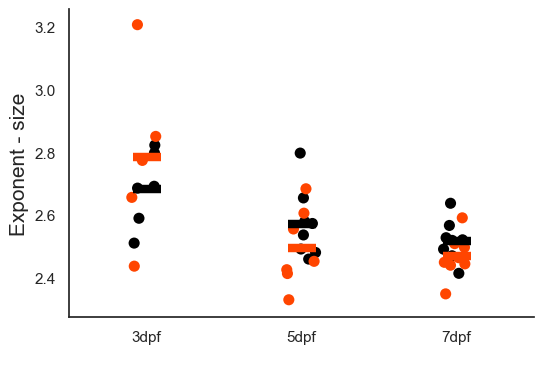

In [203]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))
colors = ['black', 'orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="age", y="exponent", data = exps_df, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="age", y="exponent", data = exps_df, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Exponent - size', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()

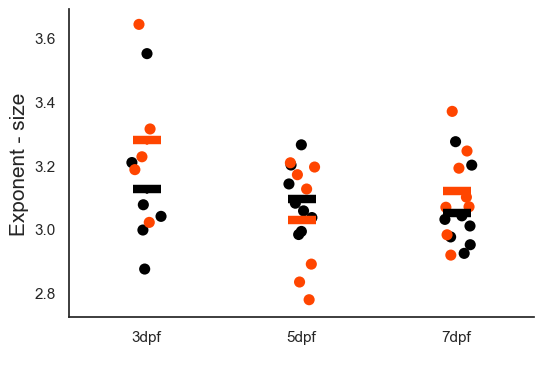

In [209]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))
colors = ['black', 'orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="age", y="exponent", data = expd_df, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="age", y="exponent", data = expd_df, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('Exponent - dur', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()

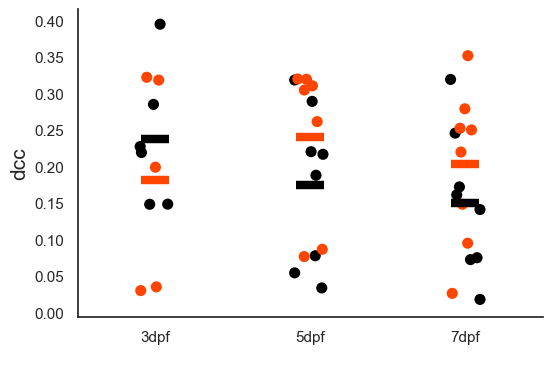

In [213]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))
colors = ['black', 'orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="age", y="dcc", data = dcc_df, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="age", y="dcc", data = dcc_df, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('dcc', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()

In [ ]:
#BR 
#----------------
for i in range(len(pkg_list)):
    for e in range(len(pkg_list[i])):
        pkg = np.load(pkg_list[i][e])
        av = np.load(av_list[i][e])
        br = crfn.branch(pkg, av)
        np.save(savepath + pkg_list[i][e][:pkg_list[i][e].find('all_cells')+10] + 'br.npy', br)
        print('Done ' + _list[i][e])

In [125]:
# Create datalists
#---------------------------------------------------------------------------
experiment = 'TECTUMSPONT-WILDTYPE'
savepath = F10t + 'Project/' + experiment + os.sep 
os.chdir(F10t + 'Project/' + experiment)
NR_3_br = sorted(glob.glob('*NR*3dpf*br*')) 
NR_5_br = sorted(glob.glob('*NR*5dpf*br*')) 
NR_7_br = sorted(glob.glob('*NR*7dpf*br*')) 

GR_3_br = sorted(glob.glob('*GR*3dpf*br*')) 
GR_5_br = sorted(glob.glob('*GR*5dpf*br*')) 
GR_7_br = sorted(glob.glob('*GR*7dpf*br*')) 

NR_list = NR_3_br, NR_5_br, NR_7_br
GR_list = GR_3_br, GR_5_br, GR_7_br
NR_list, GR_list

((['180209_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_br.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_br.npy',
   '180219_WT_NR_h2b_gc6s_3dpf_f4_sa_aligned_all_cells_br.npy',
   '180319_WT_NR_h2b_gc6s_3dpf_f2_sa_aligned_all_cells_br.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f1_sa_aligned_all_cells_br.npy',
   '180625_WT_NR_h2b_gc6s_3dpf_f3_sa_aligned_all_cells_br.npy'],
  ['180129_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_br.npy',
   '180129_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_br.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_br.npy',
   '180321_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_br.npy',
   '180328_WT_NR_h2b_gc6s_5dpf_f2_sa_aligned_all_cells_br.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_br.npy',
   '180717_WT_NR_h2b_gc6s_5dpf_f3_sa_aligned_all_cells_br.npy',
   '180718_WT_NR_h2b_gc6s_5dpf_f1_sa_aligned_all_cells_br.npy'],
  ['180220_WT_NR_h2b_gc6s_7dpf_f1_sa_aligned_all_cells_br.npy',
   '180220_WT_NR_h2b_gc6s_7dpf_f2_sa_a

In [158]:
#BRANCH RATIO
import pandas as pd

branch = list(range(42))
age = list(range(42))
cond = list(range(42))

age_list = ['3dpf', '5dpf', '7dpf']
cond_list = ['NR', 'GR']
count=0
e_count = 0
list_list = NR_list, GR_list
for i in range(len(list_list)):
    for x in range(len(list_list[i])):
        for e in range(len(list_list[i][x])):
            branch[count] = np.load(list_list[i][x][e])
            age[count] = age_list[x]
            cond[count] = cond_list[e_count]
            count+=1
    e_count+=1
bdf = pd.DataFrame({"Branching ratio":branch , "age":age, "condition": cond})


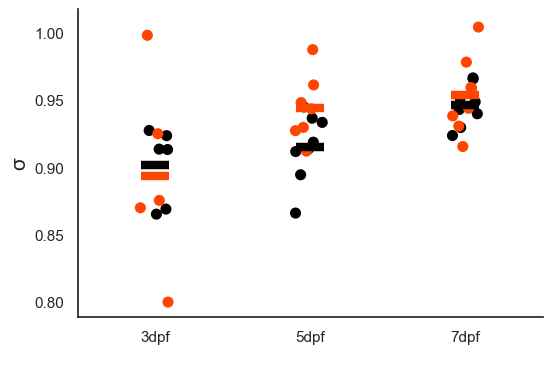

In [176]:
from matplotlib.collections import PathCollection
from matplotlib import cm
sns.set(style="white")
colors1  = cm.Spectral_r(np.linspace(0,1,len(blnlist)))
new_colors = np.vstack((colors1[0],np.vstack((colors1[2:4],colors1[5:]))))
colors = ['black', 'orangered']
fig, ax = plt.subplots(figsize = (6,4))
ax = sns.pointplot(x="age", y="Branching ratio", data = bdf, hue = 'condition', palette = colors, join=False, ci=2, scale=3, markers='_')
for artist in ax.lines:
    artist.set_zorder(10)
for artist in ax.findobj(PathCollection):
    artist.set_zorder(11)
ax = sns.stripplot(x="age", y="Branching ratio", data = bdf, hue = 'condition', palette = colors, size = 8, jitter = True ,alpha = 1)

points = ax.collections
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(' ', size = '13')
ax.set_ylabel('σ', size = '15')
ax.legend_.remove()
#plt.ylim(0.5,1.3)
plt.show()